In [1]:
# import packages and data set that will be used for the logistics regression analysis
import seaborn as sb
sb.set(style="white")
sb.set(style="whitegrid", color_codes=True)
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.core.display import HTML
from IPython.display import display
import pandas as pd
from pandas import Series, DataFrame
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
pd.set_option('display.max_columns', None)
df = pd.read_csv (r'C:\Users\fahim\Documents\0_WGUDocuments\d208\1medical_clean.csv')

In [8]:
# check if there is any missing data entries. Output should be false.
df.isna().any()

CaseOrder             False
Customer_id           False
Interaction           False
UID                   False
City                  False
State                 False
County                False
Zip                   False
Lat                   False
Lng                   False
Population            False
Area                  False
TimeZone              False
Job                   False
Children              False
Age                   False
Income                False
Marital               False
Gender                False
ReAdmis               False
VitD_levels           False
Doc_visits            False
Full_meals_eaten      False
vitD_supp             False
Soft_drink            False
Initial_admin         False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight            False
Arthritis             False
Diabetes              False
Hyperlipidemia        False
BackPain              False
Anxiety               False
Allergic_rhinitis   

In [9]:
# check if there are any duplicate data in columns
df[df.duplicated()]

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8


In [10]:
# Check if any of the columns are duplicated. Output should be False.
df.columns.duplicated().any()

False

In [11]:
# Check if any of the rows are duplicated. Output should be False.
df.duplicated().any()

False

In [12]:
# to begin cleaning the data, first drop the columns for survey questions.
df.drop(['Item8','Item7','Item6','Item5','Item4','Item3','Item2','Item1'],axis = 1,inplace=True)

In [13]:
# drop the columns for demographic data
df.drop(['City','State','County','Zip','Lat','Lng','Population','TimeZone'],axis = 1,inplace=True)

In [14]:
# drop the columns for interaction data deemed as not needed
df.drop(['Additional_charges','TotalCharge','Services','Interaction','UID'],axis = 1,inplace=True)

In [45]:
# drop the remaining columns for other data not needed in this analysis
df.drop(['Customer_id','Job','CaseOrder'],axis = 1, inplace=True)

KeyError: "['Customer_id', 'Job'] not found in axis"

In [46]:
# verify that all the columns were dropped before proceeding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Area                10000 non-null  object 
 2   Children            10000 non-null  int64  
 3   Age                 10000 non-null  int64  
 4   Income              10000 non-null  float64
 5   Marital             10000 non-null  object 
 6   Gender              10000 non-null  object 
 7   ReAdmis             10000 non-null  object 
 8   VitD_levels         10000 non-null  float64
 9   Doc_visits          10000 non-null  int64  
 10  Full_meals_eaten    10000 non-null  int64  
 11  vitD_supp           10000 non-null  int64  
 12  Soft_drink          10000 non-null  object 
 13  Initial_admin       10000 non-null  object 
 14  HighBlood           10000 non-null  object 
 15  Stroke              10000 non-null  object 
 16  Compl

In [19]:
# Callout the target variable "ReAdmis" and describe it's characteristics
target = 'ReAdmis'
for idx, c in enumerate(df.loc[:, df.columns == target]):
     if df.dtypes[c] == "object":
             print('\n{}. {} is categorical: {}.'.format(idx+1,c,df[c].unique()))
for idx,name in enumerate(df[c].value_counts().index.tolist()):
    print('\t{:<8}:{:>6}'.format(name,df[c].value_counts()[idx]))
    print('\n{}. {} is numerical.'.format(idx+1, c))


1. ReAdmis is categorical: ['No' 'Yes'].
	No      :  6331

1. ReAdmis is numerical.
	Yes     :  3669

2. ReAdmis is numerical.


In [20]:
# consolidate the data for the marital variable
df['Marital']=np.where(df['Marital'] =='Widowed', 'Not_Married',df['Marital'])
df['Marital']=np.where(df['Marital'] =='Separated', 'Not_Married',df['Marital'])
df['Marital']=np.where(df['Marital'] =='Never Married', 'Not_Married',df['Marital'])
df['Marital']=np.where(df['Marital'] =='Divorced', 'Not_Married',df['Marital'])

In [21]:
# show the new values for the marital variable to make sure the consolidation worked
df['Marital'].unique()

array(['Not_Married', 'Married'], dtype=object)

In [22]:
# Output and describe the input variables of the data set
for idx, c in enumerate(df.loc[:, df.columns != target]):
    if df.dtypes[c] == "object":
        print('\n{}. {} is categorical: {}.'.format(idx+1,c,df[c].unique()))
for idx,name in enumerate(df[c].value_counts().index.tolist()):
    print('\t{:<20}:{:>6}'.format(name,df[c].value_counts()[idx]))
    print('{}'.format(df[c].describe()))
    print('\n{}. {} is numerical.'.format(idx+1, c))


2. Area is categorical: ['Suburban' 'Urban' 'Rural'].

6. Marital is categorical: ['Not_Married' 'Married'].

7. Gender is categorical: ['Male' 'Female' 'Nonbinary'].

12. Soft_drink is categorical: ['No' 'Yes'].

13. Initial_admin is categorical: ['Emergency Admission' 'Elective Admission' 'Observation Admission'].

14. HighBlood is categorical: ['Yes' 'No'].

15. Stroke is categorical: ['No' 'Yes'].

16. Complication_risk is categorical: ['Medium' 'High' 'Low'].

17. Overweight is categorical: ['No' 'Yes'].

18. Arthritis is categorical: ['Yes' 'No'].

19. Diabetes is categorical: ['Yes' 'No'].

20. Hyperlipidemia is categorical: ['No' 'Yes'].

21. BackPain is categorical: ['Yes' 'No'].

22. Anxiety is categorical: ['Yes' 'No'].

23. Allergic_rhinitis is categorical: ['Yes' 'No'].

24. Reflux_esophagitis is categorical: ['No' 'Yes'].

25. Asthma is categorical: ['Yes' 'No'].


KeyError: 0

In [23]:
# print the columns for categorical data
CategoricalData = df.select_dtypes(include = "object").columns
print(CategoricalData)

Index(['Area', 'Marital', 'Gender', 'ReAdmis', 'Soft_drink', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma'],
      dtype='object')


In [24]:
# print the columns for numerical data
NumericalData = df.select_dtypes(include = "number").columns
print (NumericalData)

Index(['CaseOrder', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Initial_days'],
      dtype='object')


In [25]:
# check for redundancy in the data set
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [26]:
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [27]:
def custom_corr_matrix(df, title):
    fig = plt.figure(figsize=(30, 30))
    sns.set(font_scale=1.0)
    sns.heatmap(data=df.corr().round(1), annot=True,annot_kws={'size':30})
    print(get_top_abs_correlations(df))
    #plt.savefig('output/' + COURSE + '/fig_corr_matrix_' + title + '.png', facecolor='w')
    plt.show()

In [30]:
# establish parameters for plotting histograms
def plot_histogram(c):
    df_yes = df[df.ReAdmis_Yes==1][c]
    df_no = df[df.ReAdmis_Yes==0][c]
    yes_mean = df_yes.mean();
    no_mean = df_no.mean();
    fig,ax = plt.subplots(figsize=(6,6))
    ax.hist([df_yes,df_no], bins=5, stacked=True)
    ax.legend(['ReAdmis - Yes','ReAdmis - No'])
    ymin, ymax = ax.get_ylim();
    xmin, xmax = ax.get_xlim()
    ax.axvline(yes_mean, color='green', lw=2) # yes mean
    ax.axvline(no_mean, color='red', lw=2) # no mean
    ax.text((xmax-xmin)/2, (ymax-ymin)/2, 'Delta:\n' + str(round(abs(yes_mean - no_mean),2)),
           bbox={'facecolor':'white'})
    plt.title('Histogram with target overlay by ' + str(c))
    plt.xlabel(c);
    plt.ylabel('# ReAdmis');
    plt.show();

In [31]:
# set up a helper function to plot grouped bar plot
def plot_stacked(c):
    df.groupby([c,target]).size().unstack().plot(kind='bar', stacked=True)

No     6331
Yes    3669
Name: ReAdmis, dtype: int64


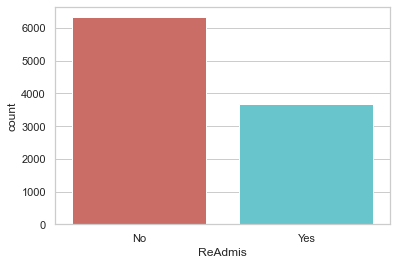

In [32]:
# begin visuallizing the data and include the univariate and bivariate analyses
print(df[target].value_counts())
sb.countplot(x=target, data=df, palette='hls')
plt.show()

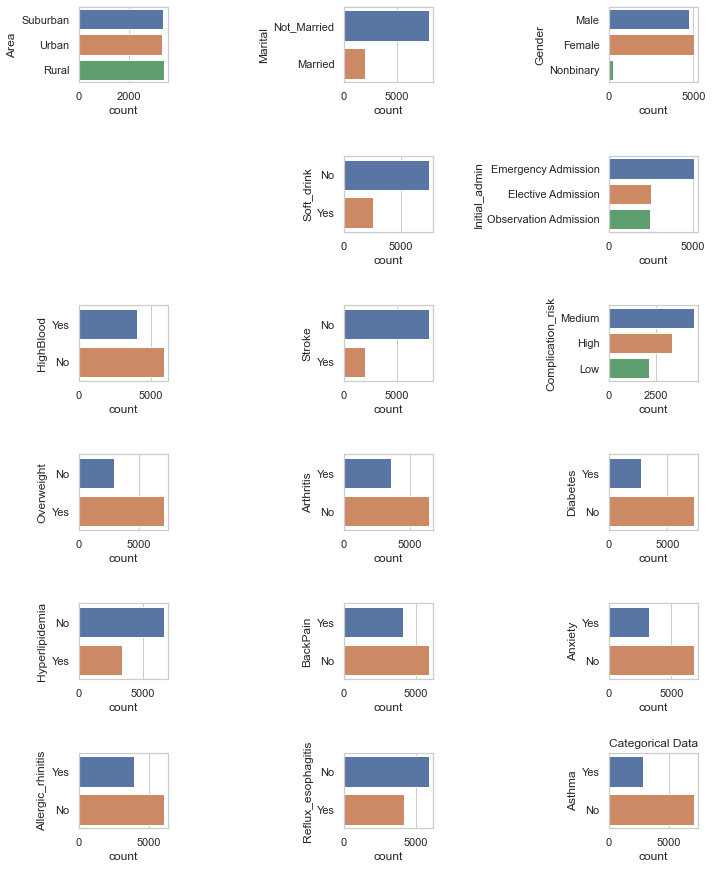

In [37]:
# visualize the categorical data and include the univariate and bivariate analyses
fig = plt.figure(figsize=(10, 20))
for i, col in enumerate(CategoricalData):
    if col != target:
        plt.subplot(10, 3, i+1)
        ax = sb.countplot(y=col, data=df)
        fig.tight_layout(h_pad=4, w_pad=4)
plt.title('Categorical Data')
plt.show()

<AxesSubplot:xlabel='Asthma'>

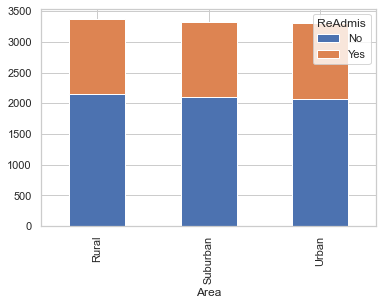

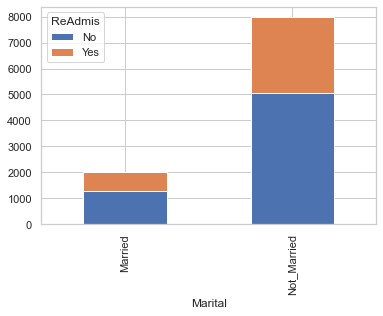

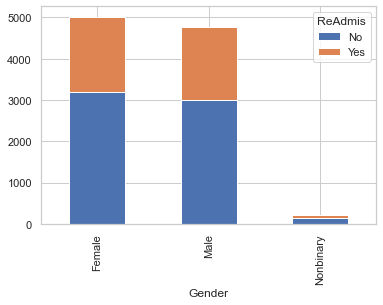

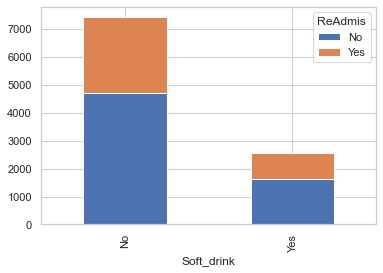

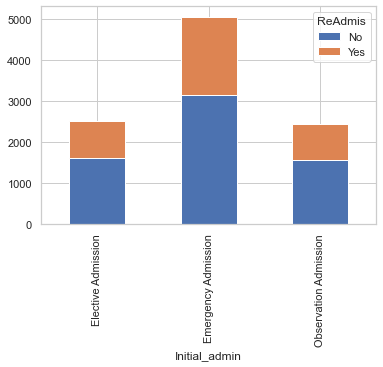

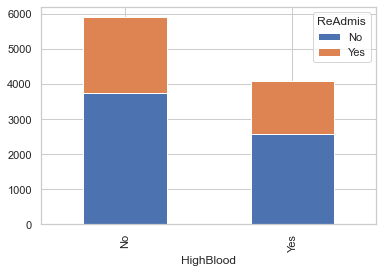

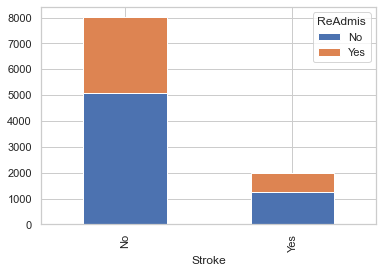

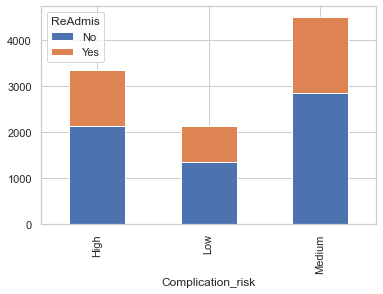

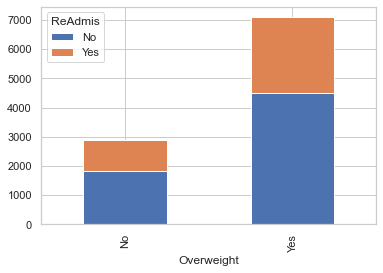

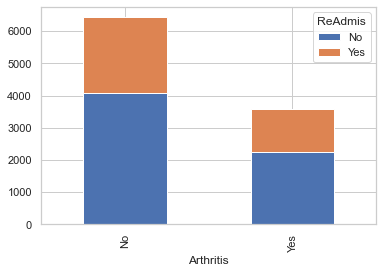

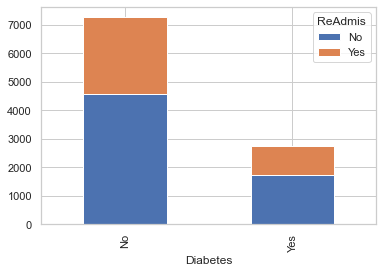

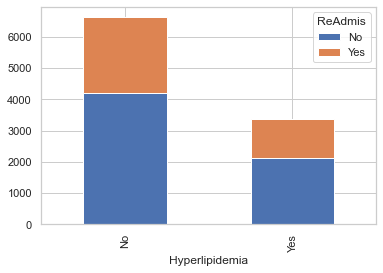

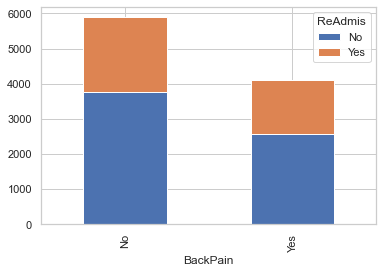

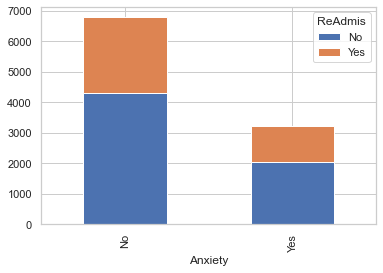

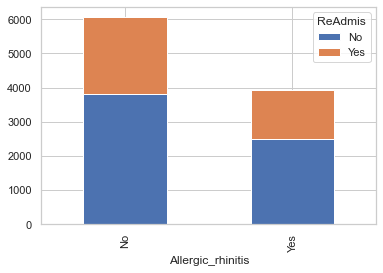

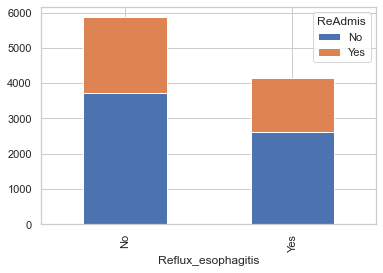

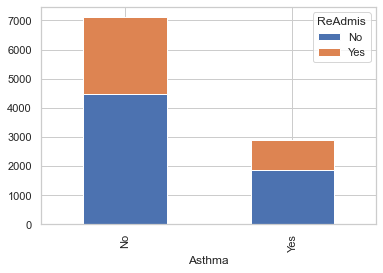

In [38]:
# Compare target variable with categorical variables
tbl = pd.pivot_table(df.groupby(['Area','ReAdmis']).size().reset_index(),
values=0,
index='Area',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Marital','ReAdmis']).size().reset_index(),
values=0,
index='Marital',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Gender','ReAdmis']).size().reset_index(),
values=0,
index='Gender',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Soft_drink','ReAdmis']).size().reset_index(),
values=0,
index='Soft_drink',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Initial_admin','ReAdmis']).size().reset_index(),
values=0,
index='Initial_admin',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['HighBlood','ReAdmis']).size().reset_index(),
values=0,
index='HighBlood',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Stroke','ReAdmis']).size().reset_index(),
values=0,
index='Stroke',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Complication_risk','ReAdmis']).size().reset_index(),
values=0,
index='Complication_risk',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Overweight','ReAdmis']).size().reset_index(),
values=0,
index='Overweight',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Arthritis','ReAdmis']).size().reset_index(),
values=0,
index='Arthritis',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Diabetes','ReAdmis']).size().reset_index(),
values=0,
index='Diabetes',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Hyperlipidemia','ReAdmis']).size().reset_index(),
values=0,
index='Hyperlipidemia',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['BackPain','ReAdmis']).size().reset_index(),
values=0,
index='BackPain',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Anxiety','ReAdmis']).size().reset_index(),
values=0,
index='Anxiety',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Allergic_rhinitis','ReAdmis']).size().reset_index(),
values=0,
index='Allergic_rhinitis',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Reflux_esophagitis','ReAdmis']).size().reset_index(),
values=0,
index='Reflux_esophagitis',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)
tbl = pd.pivot_table(df.groupby(['Asthma','ReAdmis']).size().reset_index(),
values=0,
index='Asthma',
columns=['ReAdmis'],
aggfunc=np.sum)
tbl.plot(kind='bar',stacked=True)

In [39]:
# Review numerical mean data compared to target variable
df.groupby(target).mean().round(2).T

ReAdmis,No,Yes
CaseOrder,3550.54,7502.46
Children,2.06,2.16
Age,53.26,53.94
Income,40740.26,40059.52
VitD_levels,17.96,17.98
Doc_visits,5.01,5.01
Full_meals_eaten,1.01,0.99
vitD_supp,0.39,0.41
Initial_days,17.41,63.86


In [40]:
# Statistics for numerical data
df[NumericalData].describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
CaseOrder,10000.0,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
Children,10000.0,2.097,2.164,0.000,0.000,1.000,3.000,10.000
Age,10000.0,53.512,20.639,18.000,36.000,53.000,71.000,89.000
Income,10000.0,40490.495,28521.153,154.080,19598.775,33768.420,54296.402,207249.100
VitD_levels,10000.0,17.964,2.017,9.806,16.626,17.951,19.348,26.394
Doc_visits,10000.0,5.012,1.046,1.000,4.000,5.000,6.000,9.000
Full_meals_eaten,10000.0,1.001,1.008,0.000,0.000,1.000,2.000,7.000
vitD_supp,10000.0,0.399,0.629,0.000,0.000,0.000,1.000,5.000
Initial_days,10000.0,34.455,26.309,1.002,7.896,35.836,61.161,71.981
